import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#pca and scaling
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
#datset 
from sklearn.datasets import fetch_openml

Defaulting to user installation because normal site-packages is not writeable
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.12.19-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached markdown_it_py-4.0.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/331.8 MB ? eta -:--:--
   -------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: C:\Program Files\Python311\python.exe -m pip install --upgrade pip


MNIST images contain highly correlated pixels; PCA helps remove redundancy
and capture dominant visual patterns efficiently.


load dataset

In [5]:


mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X = mnist.data
y = mnist.target



In [6]:
print(X.shape)
print(y.shape)


(70000, 784)
(70000,)


In [7]:
y = y.astype(int)


Visualize One Digit

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

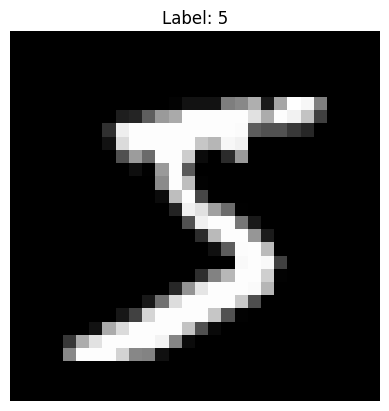

In [10]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y[0]}")
plt.axis('off')


normalize

In [11]:
X = X / 255.0


standardize

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


PCA – Variance Analysis

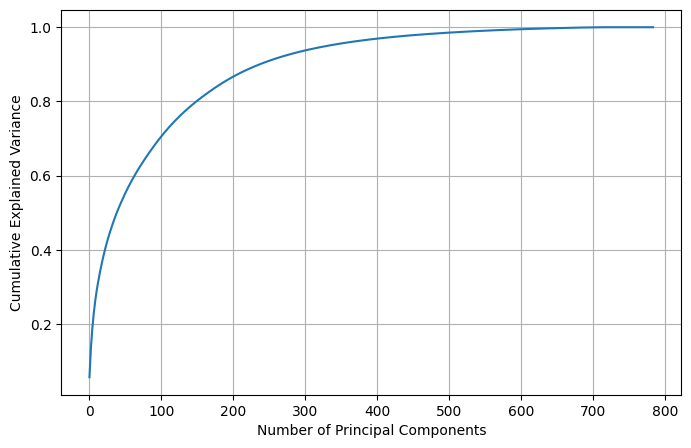

In [13]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(cumulative_variance)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()


Reduce Dimensions (Final PCA)

In [14]:
pca_final = PCA(n_components=40)
X_reduced = pca_final.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Reduced shape:", X_reduced.shape)


Original shape: (70000, 784)
Reduced shape: (70000, 40)


2D Visualization using PCA

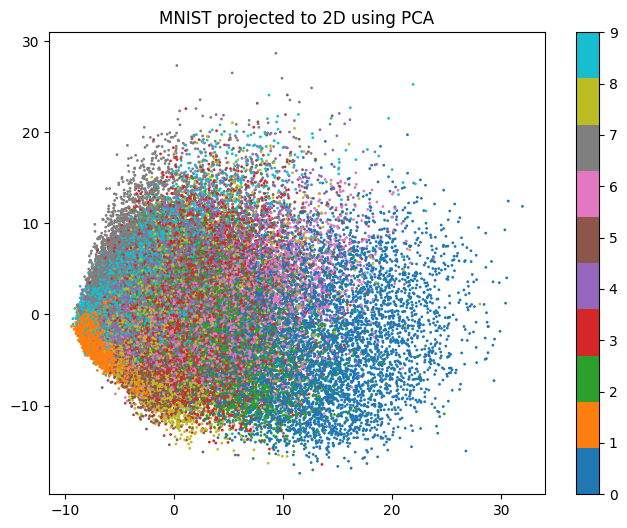

In [15]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=y, cmap='tab10', s=1)
plt.colorbar()
plt.title("MNIST projected to 2D using PCA")
plt.show()


PCA Reconstruction

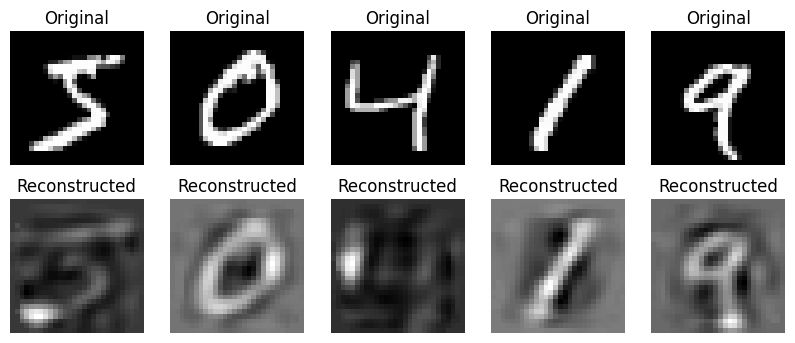

In [16]:
# Reconstruct images from PCA
X_reconstructed = pca_final.inverse_transform(X_reduced)

plt.figure(figsize=(10,4))

for i in range(5):
    # Original
    plt.subplot(2,5,i+1)
    plt.imshow(X[i].reshape(28,28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    # Reconstructed
    plt.subplot(2,5,i+6)
    plt.imshow(X_reconstructed[i].reshape(28,28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()


PCA + KMeans

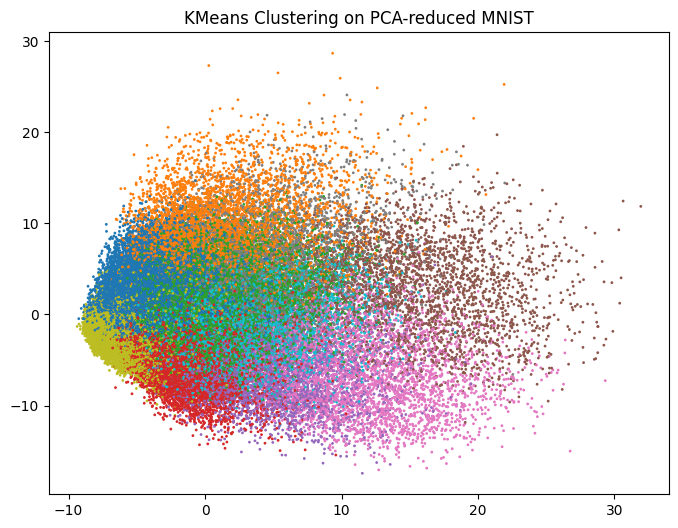

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_reduced)

plt.figure(figsize=(8,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=clusters, cmap='tab10', s=1)
plt.title("KMeans Clustering on PCA-reduced MNIST")
plt.show()


What I did

Reduced 784-dimensional image data using PCA

Retained ~90% variance with only 40 components

Visualized high-dimensional data in 2D

Demonstrated reconstruction quality

Why PCA here

Images have correlated pixels

High dimensionality hurts distance-based models

PCA removes redundancy